In [33]:
# Importing essential libraries
import numpy as np
import pandas as pd
import warnings 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pickle
import shutil
warnings.filterwarnings("ignore")

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.shape

(569, 33)

In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data = data.drop(['Unnamed: 32', 'id'], axis=1)

In [8]:
data.shape

(569, 31)

In [9]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


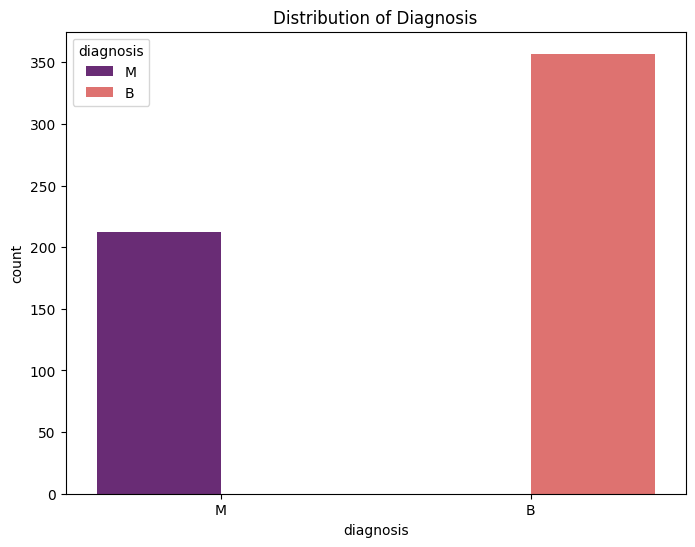

In [10]:
plt.figure(figsize=(8, 6),)
sns.countplot(x='diagnosis', hue = data.diagnosis, data=data, palette='magma')
plt.title('Distribution of Diagnosis')
plt.show()

In [11]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [12]:
# Check data types and null values in the 'diagnosis' column
print(data['diagnosis'].dtype)
print(data['diagnosis'].isnull().sum())
print(data['diagnosis'].unique())

int64
0
[1 0]


In [13]:
data['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [14]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

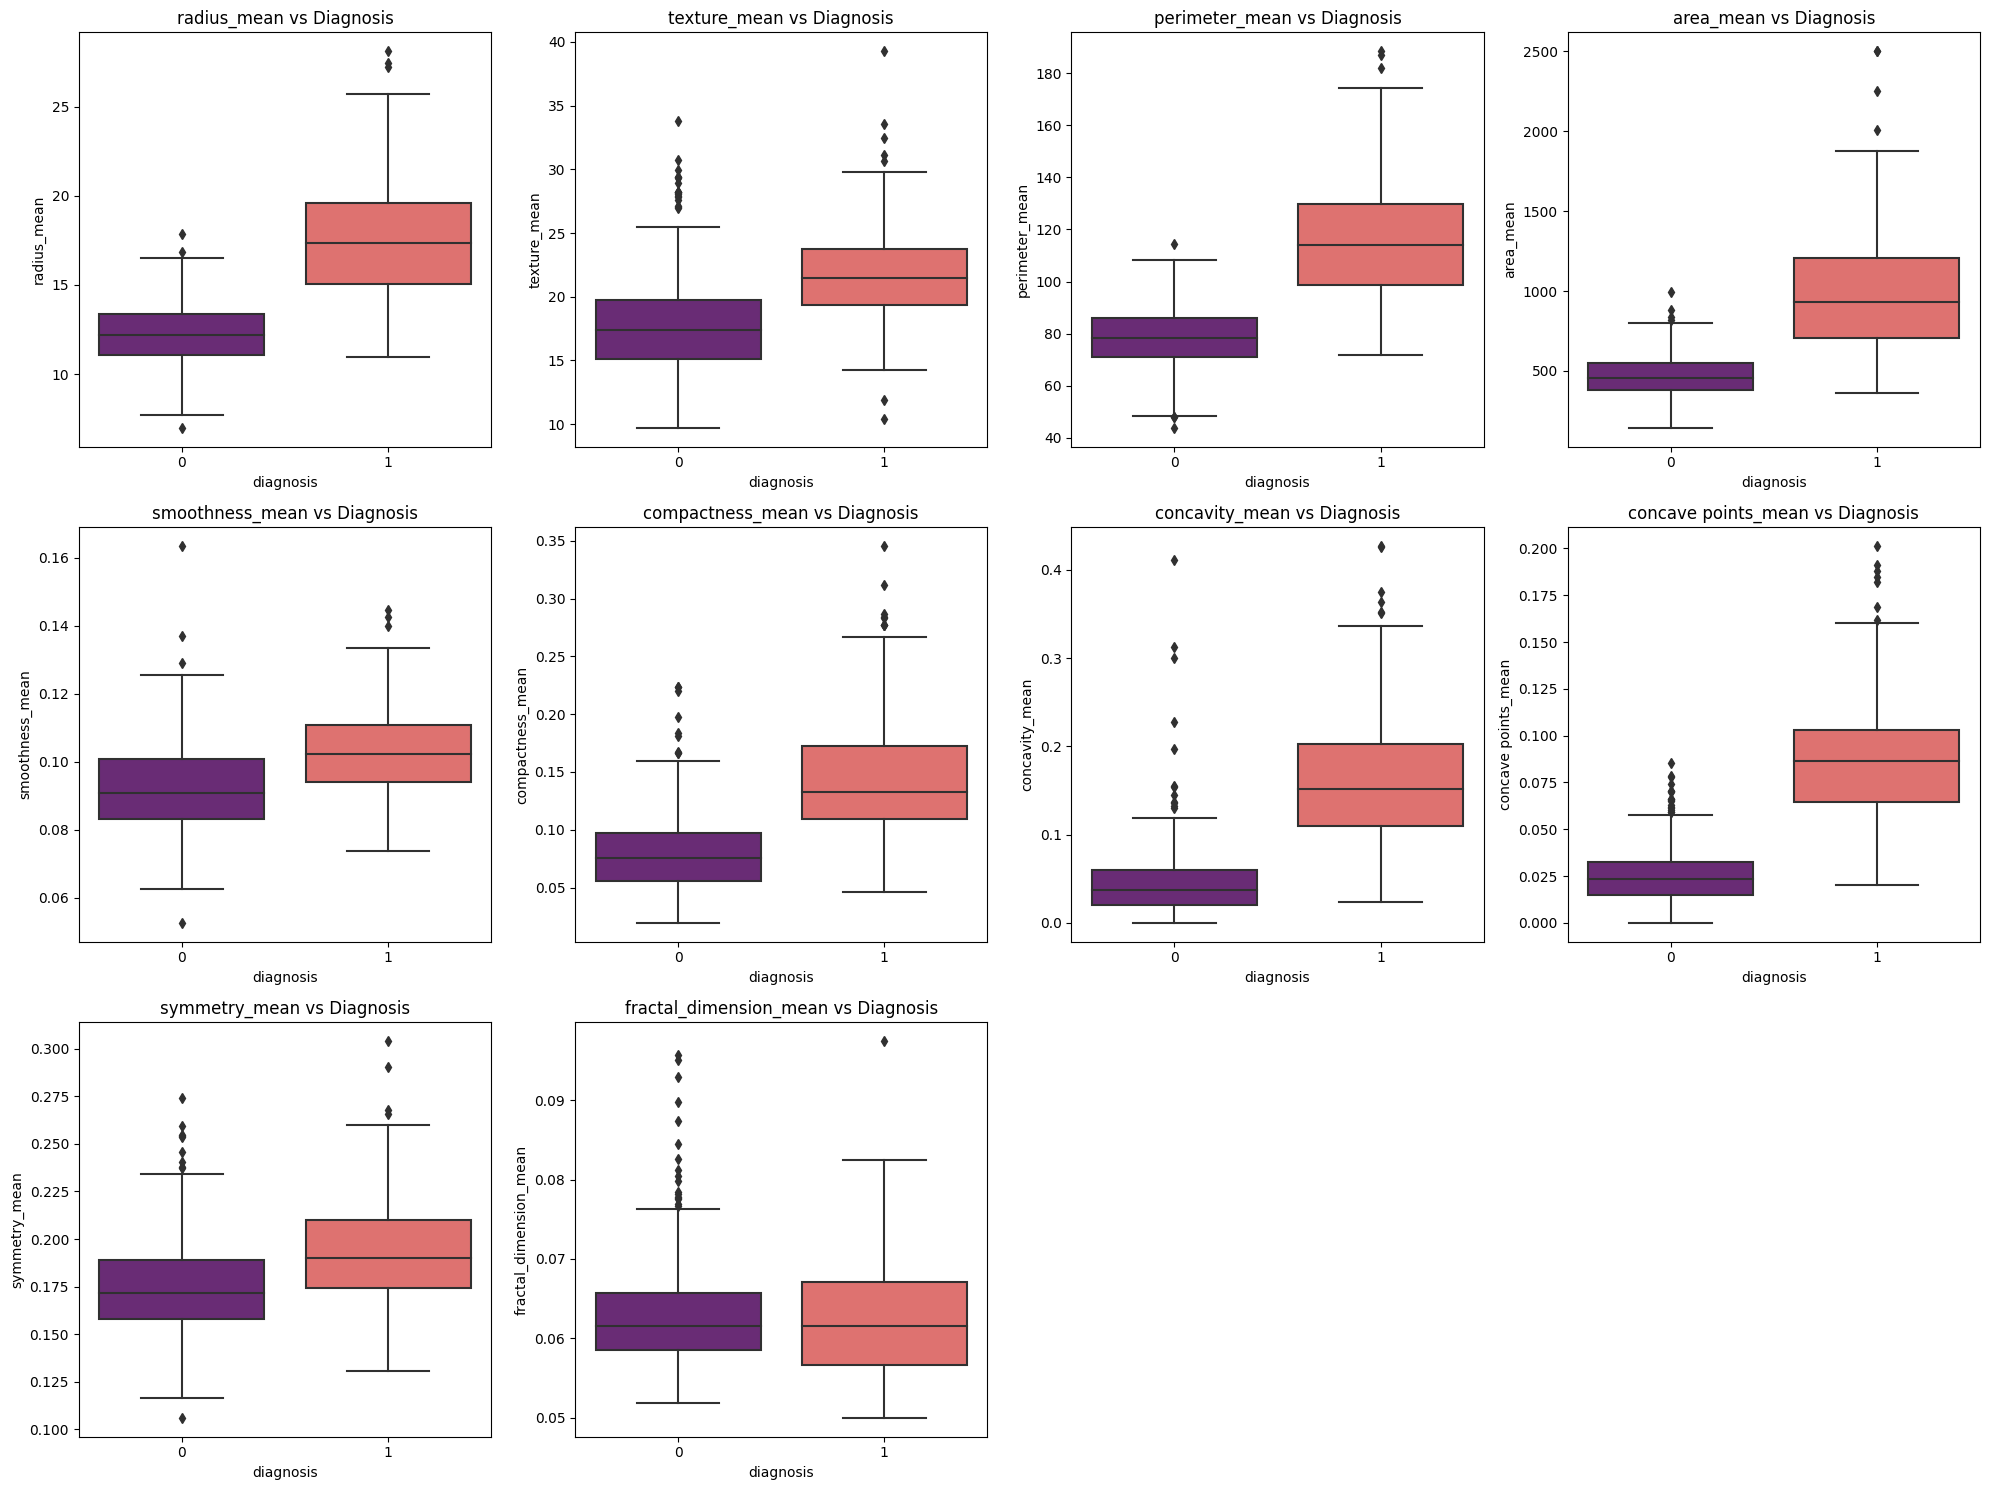

In [15]:
mean_features = [col for col in data.columns if 'mean' in col]
plt.figure(figsize=(20, 15))
for i, feature in enumerate(mean_features):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=data, palette='magma')
    plt.title(f'{feature} vs Diagnosis')
plt.tight_layout()
plt.show()

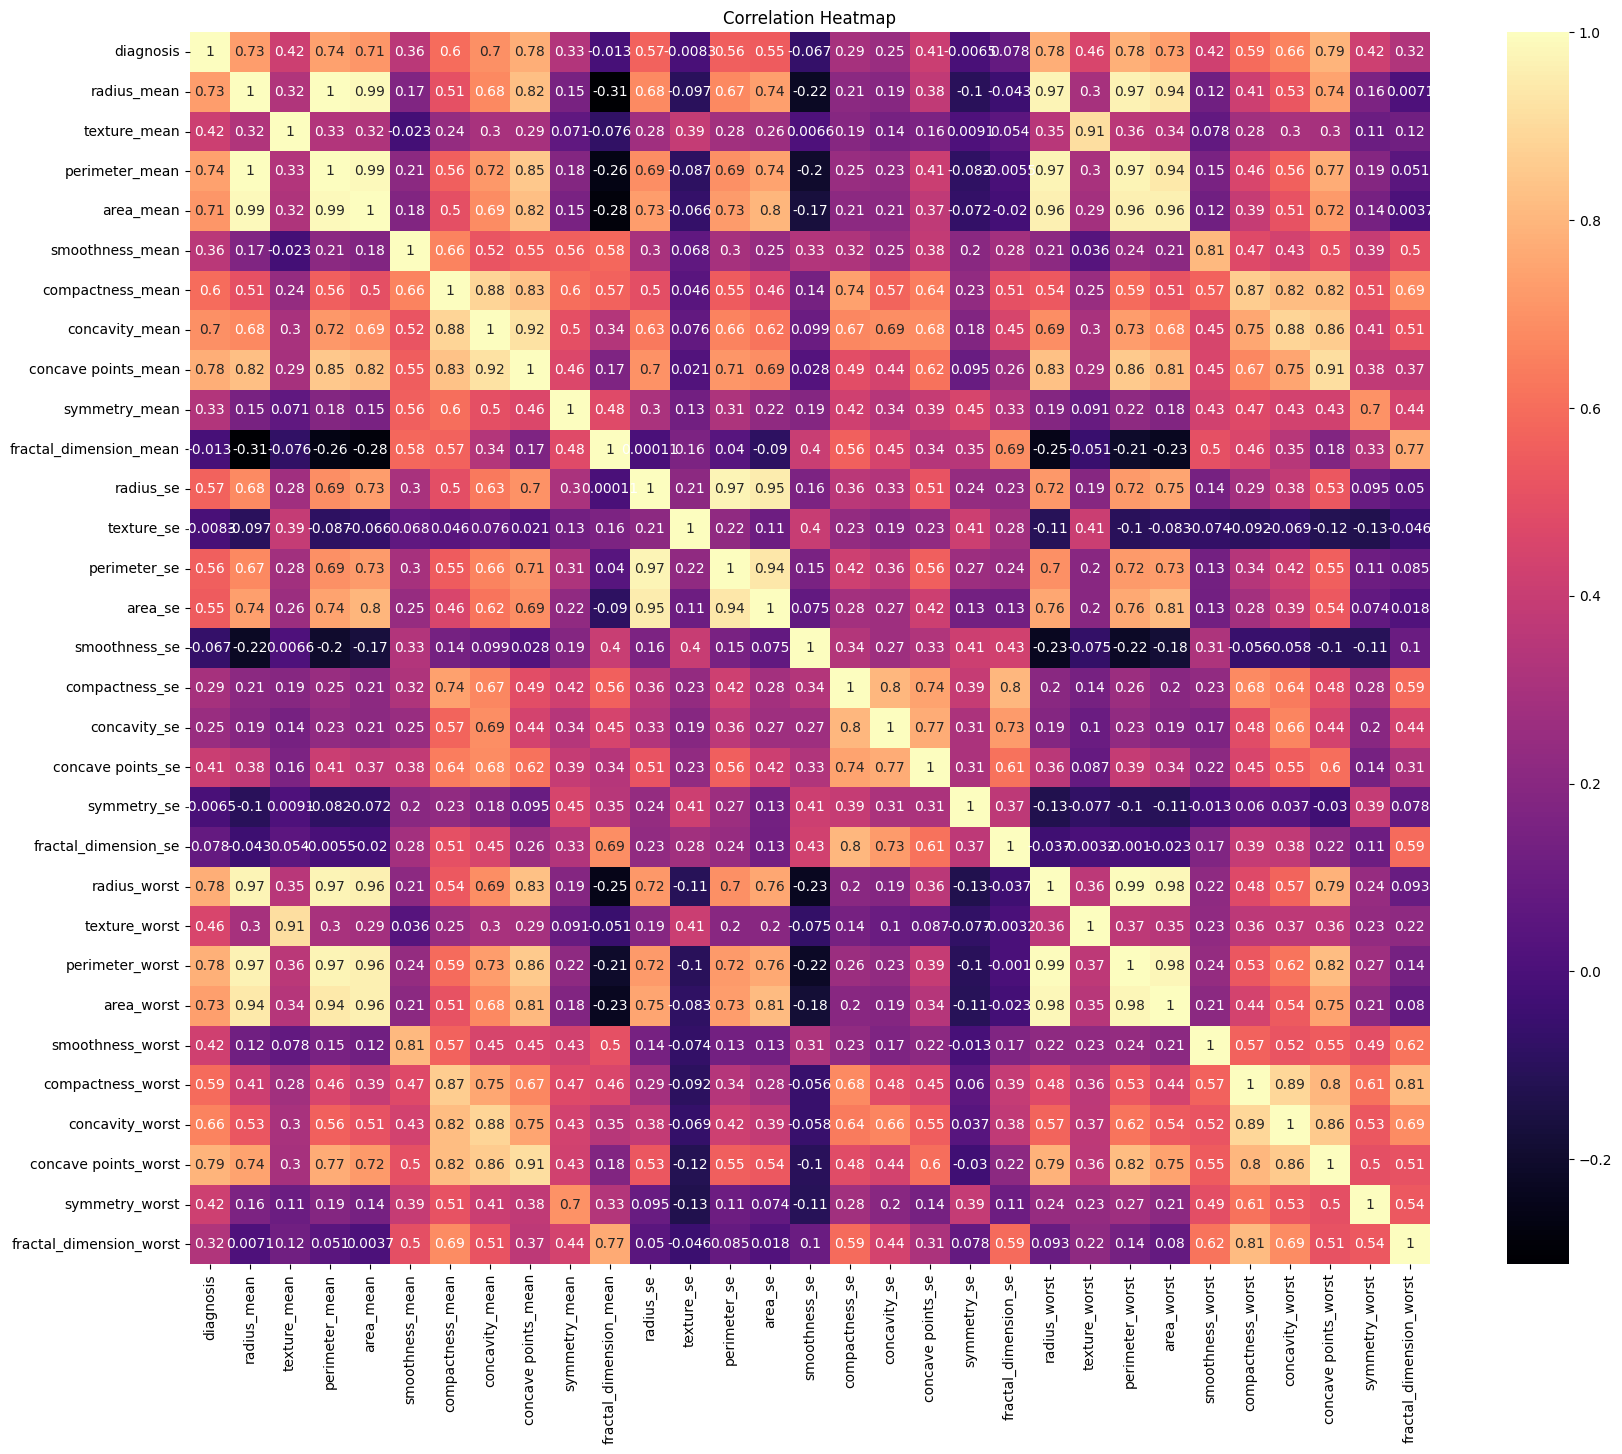

In [16]:
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

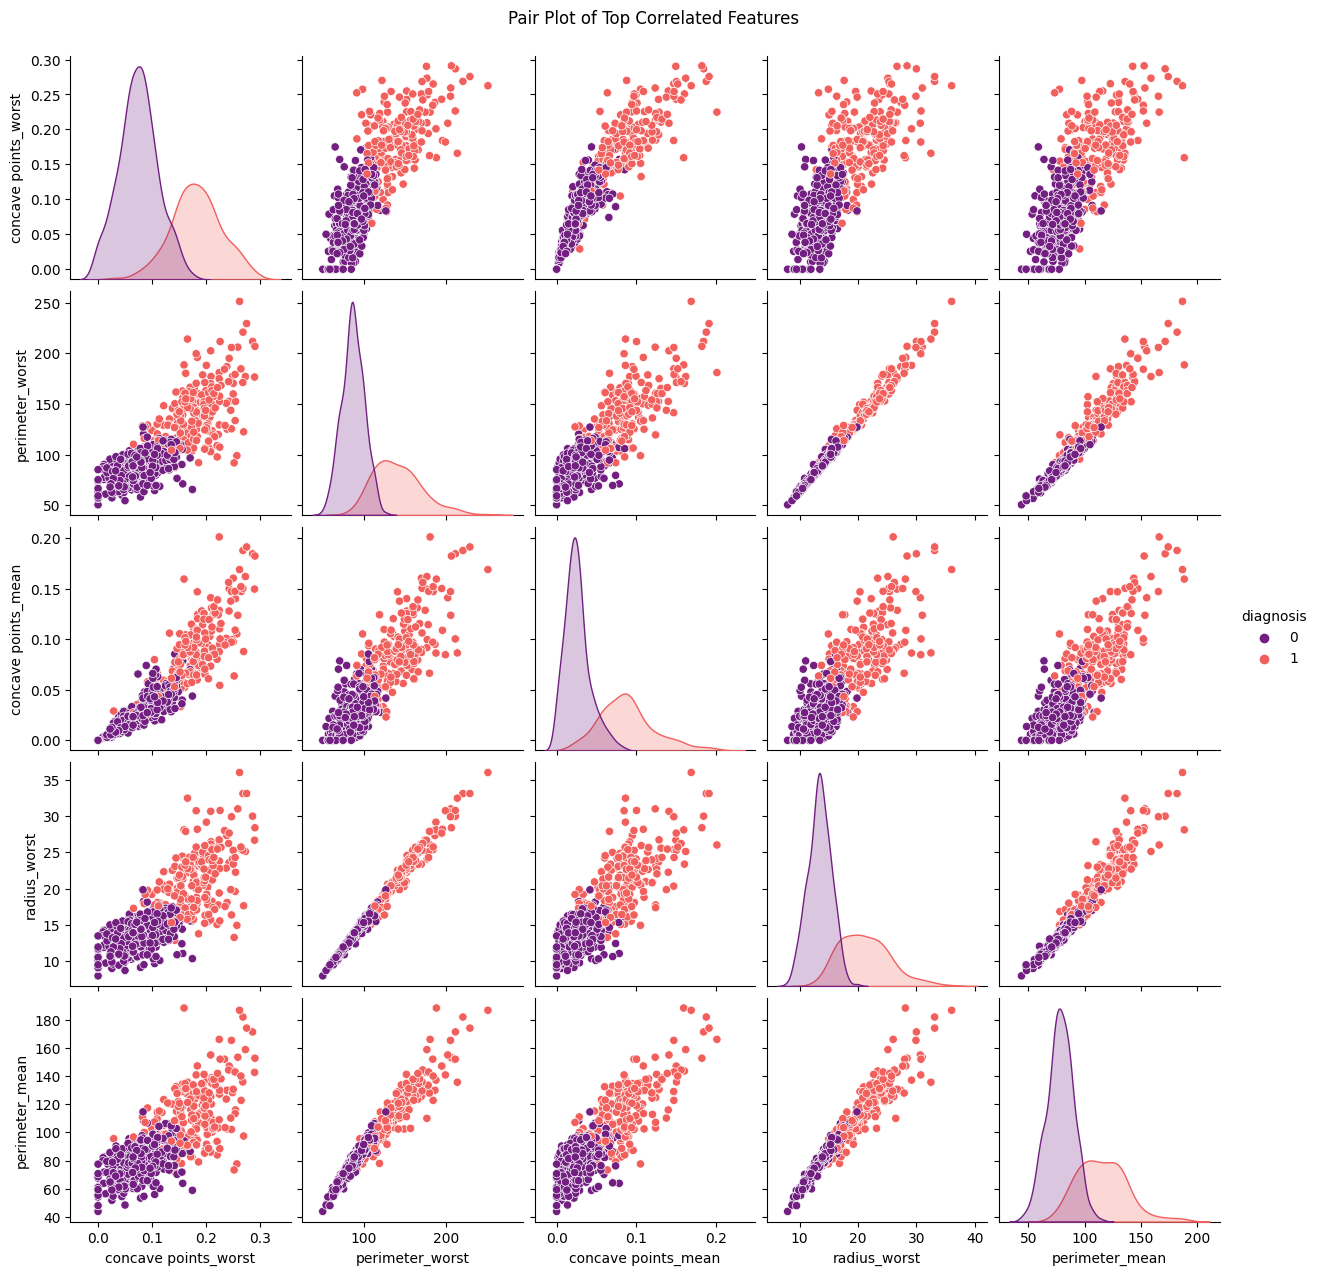

In [17]:
# Calculate correlations with 'diagnosis'
corr_matrix = data.corr()

# Extract the top 5 most correlated features with 'diagnosis'
high_corr_features = corr_matrix['diagnosis'].abs().sort_values(ascending=False)[1:6].index.tolist()

# Create a pairplot for the most correlated features
sns.pairplot(data[high_corr_features + ['diagnosis']], hue='diagnosis', palette='magma')
plt.suptitle('Pair Plot of Top Correlated Features', y=1.02)
plt.show()


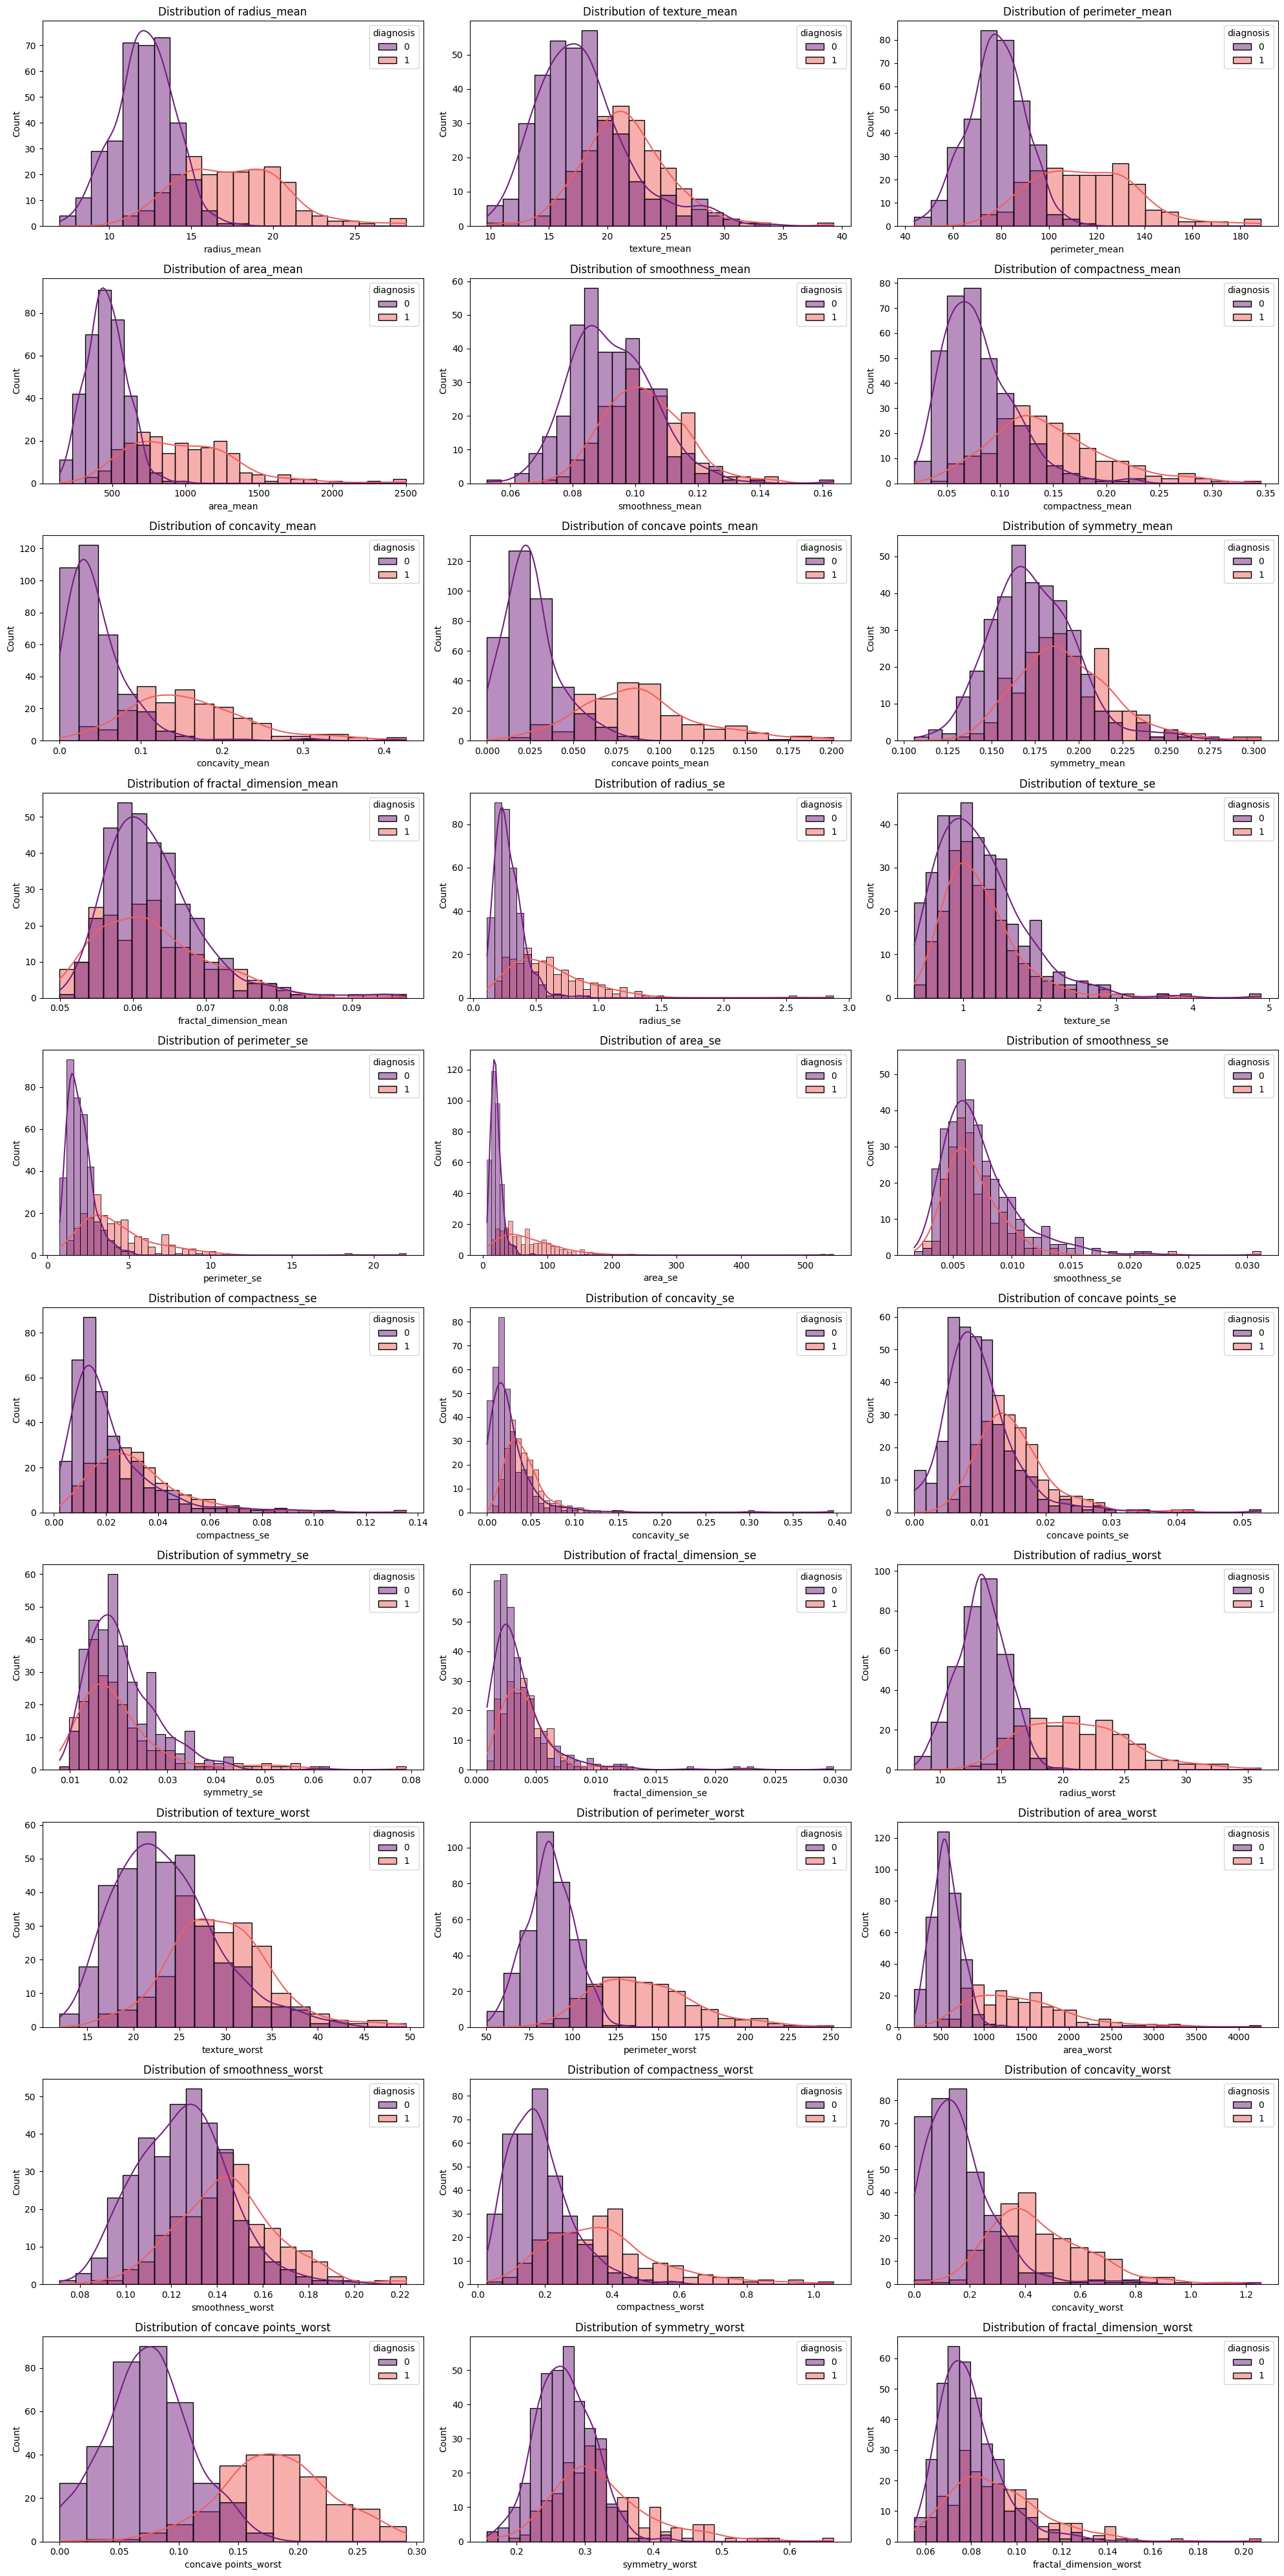

In [18]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(data.columns[1:]):  # Skip 'diagnosis'
    plt.subplot(10, 3, i+1)
    sns.histplot(data=data, x=column, hue='diagnosis', kde=True, palette='magma')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# **SVM**

In [19]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [20]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Initialize and train the SVM model
linear_svm = SVC(kernel='linear', C=1, random_state=0)
linear_svm.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [23]:
# Make predictions using training data
train_predictions = linear_svm.predict(X_train_scaled)

In [24]:
# Train data accuracy and F1 score
print("TRAIN Confusion Matrix:\n", confusion_matrix(y_train, train_predictions))
print("TRAIN DATA Accuracy:", accuracy_score(y_train, train_predictions))
print("Train data F1-Score for class '1':", f1_score(y_train, train_predictions, pos_label=1))
print("Train data F1-Score for class '0':", f1_score(y_train, train_predictions, pos_label=0))

TRAIN Confusion Matrix:
 [[283   3]
 [  3 166]]
TRAIN DATA Accuracy: 0.9868131868131869
Train data F1-Score for class '1': 0.9822485207100592
Train data F1-Score for class '0': 0.9895104895104895


In [25]:
# Make predictions using testing data
test_predictions = linear_svm.predict(X_test_scaled)

In [26]:
# Test data accuracy and F1 score
print("TEST Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))
print("TEST DATA Accuracy:", accuracy_score(y_test, test_predictions))
print("Test data F1-Score for class '1':", f1_score(y_test, test_predictions, pos_label=1))
print("Test data F1-Score for class '0':", f1_score(y_test, test_predictions, pos_label=0))

TEST Confusion Matrix:
 [[68  3]
 [ 2 41]]
TEST DATA Accuracy: 0.956140350877193
Test data F1-Score for class '1': 0.942528735632184
Test data F1-Score for class '0': 0.9645390070921985


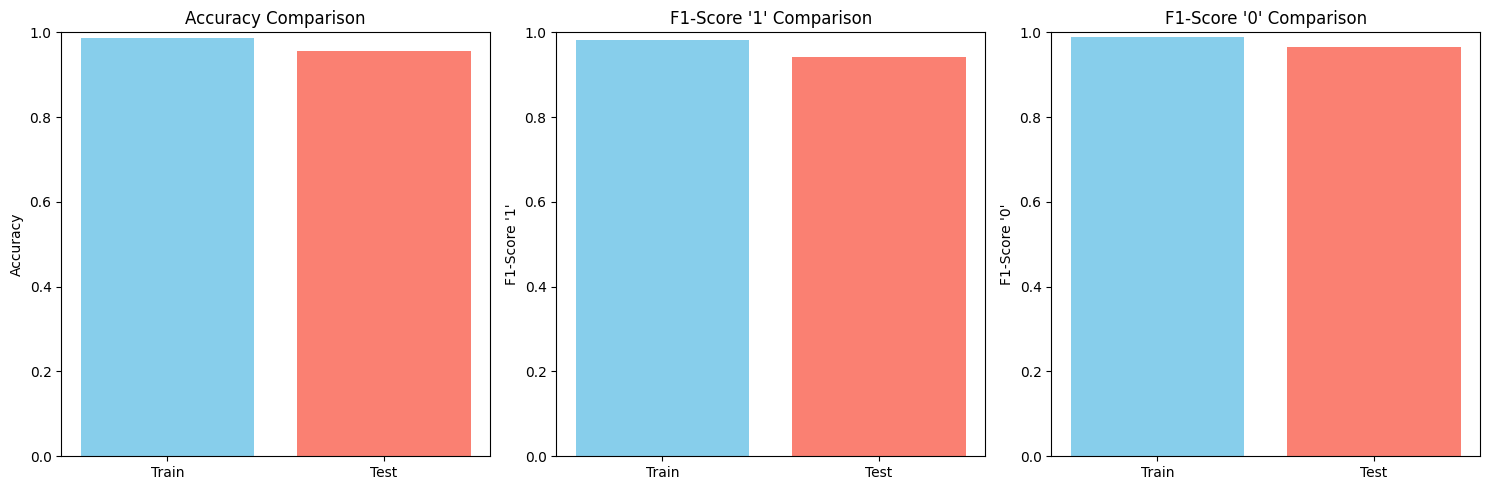

In [27]:
# Define the models and their respective metrics
metrics = ['Accuracy', "F1-Score '1'", "F1-Score '0'"]
train_scores = [accuracy_score(y_train, train_predictions), f1_score(y_train, train_predictions, pos_label=1), f1_score(y_train, train_predictions, pos_label=0)]  # Accuracy, F1 '1', F1 '0' for Train
test_scores = [accuracy_score(y_test, test_predictions), f1_score(y_test, test_predictions, pos_label=1), f1_score(y_test, test_predictions, pos_label=0)]   # Accuracy, F1 '1', F1 '0' for Test

# Create subplots for better layout
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot each metric
for i, metric in enumerate(metrics):
    ax[i].bar(['Train', 'Test'], [train_scores[i], test_scores[i]], color=['skyblue', 'salmon'])
    ax[i].set_title(f'{metric} Comparison')
    ax[i].set_ylabel(metric)
    ax[i].set_ylim(0, 1)  # Since metrics are in range [0,1] for easy comparison

# Adjust layout and show plot
plt.tight_layout()
plt.show()


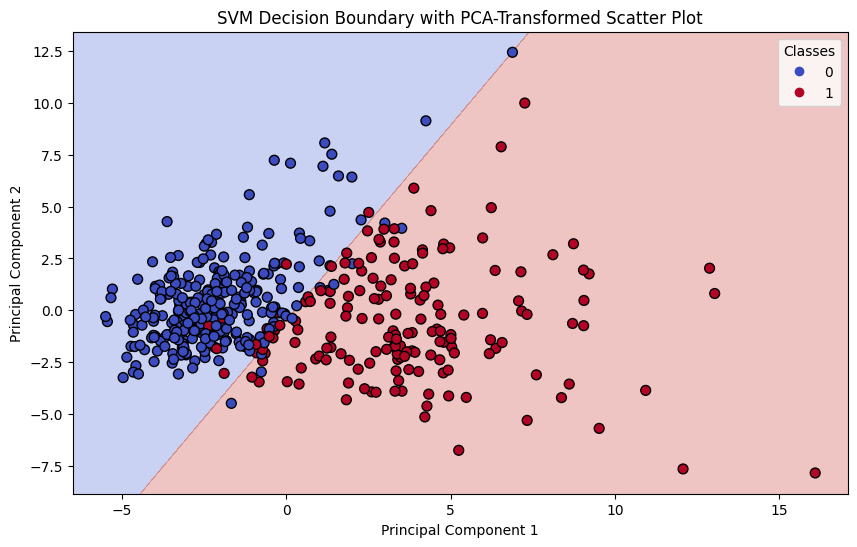

In [28]:
# Use PCA to reduce features to two dimensions for plotting
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Train the SVM on the two principal components
svm_2d = SVC(kernel='linear', C=1, random_state=0)
svm_2d.fit(X_train_2d, y_train)

# Set up the mesh grid for the decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict for each point in the mesh grid
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot the train data points
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=50, cmap='coolwarm', edgecolor='k', label="Train Data")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA-Transformed Scatter Plot')

# Add legend
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    



Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Random Forest Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


SVM Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98   

In [38]:
    if acc > best_score:
        best_score = acc
        best_model = model
        best_model_name = name

print(f"\nBest Model: {best_model_name} with Accuracy: {best_score:.4f}")


Best Model: SVM with Accuracy: 0.9825


In [39]:
#Save best model using pickle
import pickle

with open('best_model_can.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# 4. Save scaler too (for consistent preprocessing in app)
with open('scaler_can.pkl', 'wb') as f:
    pickle.dump(scaler, f)